In [1]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

# Download das Bases

In [2]:
bd.get_table_size(dataset_id='br_tse_eleicoes',
                  table_id='candidatos',
                  billing_project_id="rfid-250503")


project_id: 
	basedosdados 
dataset_id: 
	br_tse_eleicoes 
table_id: 
	candidatos 
num_rows: 
	2858297 
size_mb: 
	0.0 
-----------------------------------------------------------------------------------------------



In [3]:
bd.get_table_size(dataset_id='br_tse_eleicoes',
                  table_id='resultados_candidato',
                  billing_project_id="rfid-250503")


project_id: 
	basedosdados 
dataset_id: 
	br_tse_eleicoes 
table_id: 
	resultados_candidato 
num_rows: 
	2598426 
size_mb: 
	0.0 
-----------------------------------------------------------------------------------------------



In [4]:
query = """
SELECT *
FROM `basedosdados.br_tse_eleicoes.candidatos` 
WHERE ano = 2018
"""
df_candidatos = bd.read_sql(query, billing_project_id="rfid-250503")

Downloading: 100%|███████████████████████████████████████████████████████████| 29088/29088 [00:17<00:00, 1649.80rows/s]


In [5]:
query = """
SELECT *
FROM `basedosdados.br_tse_eleicoes.resultados_candidato` 
WHERE ano = 2018
"""
df_resultados = bd.read_sql(query, billing_project_id="rfid-250503")

Downloading: 100%|███████████████████████████████████████████████████████████| 26462/26462 [00:04<00:00, 5508.51rows/s]


# Limpeza dos dados

## Base df_resultados

In [6]:
df_resultados

,ano,turno,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,cargo,sigla_partido,numero_candidato,sequencial_candidato,id_candidato_bd,resultado,votos
0,2018,1,eleicao ordinaria,None,None,None,presidente,DC,27,280000624085,None,nao eleito,41710
1,2018,1,eleicao ordinaria,None,None,None,presidente,MDB,15,280000622281,897799,nao eleito,1288950
2,2018,1,eleicao ordinaria,None,None,None,presidente,NOVO,30,280000607640,1494256,nao eleito,2679745
3,2018,1,eleicao ordinaria,None,None,None,presidente,PATRIOTA,51,280000602500,767512,nao eleito,1348323
4,2018,1,eleicao ordinaria,None,None,None,presidente,PDT,12,280000605589,616370,nao eleito,13344371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26457,2018,2,eleicao ordinaria,SC,None,None,governador,PSL,17,240000609724,1405354,eleito,2644179
26458,2018,2,eleicao ordinaria,SE,None,None,governador,PSB,40,260000614791,1604206,nao eleito,370161
26459,2018,2,eleicao ordinaria,SE,None,None,governador,PSD,55,260000623573,730970,eleito,679051
26460,2018,2,eleicao ordinaria,SP,None,None,governador,PSB,40,250000615141,328516,nao eleito,10248740


Queremos apenas os candidatos que:
    1. Concorreram para cargos legislativos
    2. Foram eleitos

    
Vamos ver quais os os cargos que foram votados em 2018

In [7]:
df_resultados.cargo.unique()

array(['presidente', 'deputado estadual', 'deputado federal',
       'governador', 'senador', 'deputado distrital'], dtype=object)

In [8]:
cargos_legislativos = [
    'deputado estadual', 'deputado federal', 'senador', 'deputado distrital'
]

Vamos selecionar os resultados que indicam que o candidato foi eleito

In [9]:
df_resultados.resultado.unique()

array(['nao eleito', '2º turno', 'suplente', 'eleito por qp',
       'eleito por media', 'eleito'], dtype=object)

In [10]:
categ_eleito = ['eleito', 'eleito por qp', 'eleito por media']

Agora filtramos apenas os resultados que nos interessa

In [11]:
eleitos = df_resultados.resultado.isin(categ_eleito)
legislativos = df_resultados.cargo.isin(cargos_legislativos)

In [12]:
df_eleitos_legis = df_resultados[eleitos&legislativos]

Mantemos apenas as colunas que nos serão úteis

In [13]:
df_eleitos_legis.columns

Index(['ano', 'turno', 'tipo_eleicao', 'sigla_uf', 'id_municipio',
       'id_municipio_tse', 'cargo', 'sigla_partido', 'numero_candidato',
       'sequencial_candidato', 'id_candidato_bd', 'resultado', 'votos'],
      dtype='object')

In [14]:
colunas_selecionadas = ['tipo_eleicao','sigla_uf','cargo',
                        'sigla_partido','id_candidato_bd',
                        'resultado','votos','sequencial_candidato']

In [15]:
df_eleitos_legis_col_sel = df_eleitos_legis[colunas_selecionadas]

In [16]:
df_eleitos_legis_col_sel

,tipo_eleicao,sigla_uf,cargo,sigla_partido,id_candidato_bd,resultado,votos,sequencial_candidato
52,eleicao ordinaria,AC,deputado estadual,DEM,479202,eleito por qp,5021,10000624305
64,eleicao ordinaria,AC,deputado estadual,MDB,1462277,eleito por qp,9405,10000610628
70,eleicao ordinaria,AC,deputado estadual,MDB,1276214,eleito por media,9139,10000610634
73,eleicao ordinaria,AC,deputado estadual,MDB,1347133,eleito por qp,10349,10000610637
78,eleicao ordinaria,AC,deputado estadual,PC do B,798934,eleito por qp,6662,10000608372
...,...,...,...,...,...,...,...,...
26402,eleicao ordinaria,TO,deputado federal,PT,625895,eleito por media,18167,270000626122
26416,eleicao ordinaria,TO,deputado federal,SOLIDARIEDADE,119394,eleito por qp,71842,270000618825
26417,eleicao ordinaria,TO,deputado federal,SOLIDARIEDADE,801809,eleito por qp,48812,270000618830
26424,eleicao ordinaria,TO,senador,PSD,1379625,eleito,214355,270000626087


Checamos se os dados estão coerentes com o que conhecemos das eleições

In [17]:
df_eleitos_legis_col_sel.cargo.value_counts()

deputado estadual     1035
deputado federal       513
senador                 52
deputado distrital      24
Name: cargo, dtype: int64

## Base df_canditatos

Primeiro, vamos conhecer as colunas que temos para selecionar as mais interessantes

In [18]:
print(df_candidatos.iloc[0])

ano                                                2018
tipo_eleicao                          eleicao ordinaria
sigla_uf                                             AP
id_municipio                                       None
id_municipio_tse                                   None
id_candidato_bd                                  786272
cpf                                         20892454253
titulo_eleitoral                           000264872534
sequencial                                  30000618166
numero                                              212
nome                           Marileide Da Silva Lopes
nome_urna                               Marileide Lopes
numero_partido                                       21
sigla_partido                                       PCB
cargo                                       1º suplente
situacao                                       deferido
ocupacao                                    comerciante
data_nascimento                     1964-09-16 0

Queremos apenas os candidatos que foram deferidos

In [19]:
df_candidatos_def = df_candidatos[df_candidatos['situacao']=='deferido']

Selecionamos as colunas que nos interessam

In [20]:
colsel_caract_candidatos = ['nome','nome_urna',
                            'ocupacao','data_nascimento',
                            'idade','genero','instrucao','estado_civil',
                            'nacionalidade','sigla_uf_nascimento',
                            'municipio_nascimento','raca','sequencial']

In [21]:
df_candidatos_col_sel = df_candidatos_def[colsel_caract_candidatos]

## Juntamos as 2 bases

In [22]:
df_uni = pd.merge(left=df_eleitos_legis_col_sel,
                  right=df_candidatos_col_sel,
                  left_on='sequencial_candidato',
                  right_on='sequencial',
                  how="left")

In [23]:
df_uni_mul = df_uni[df_uni.genero=='feminino']
df_uni_hom = df_uni[df_uni.genero=='masculino']

# Desenvolvimento das visualizações

## Números absolutos de eleitos

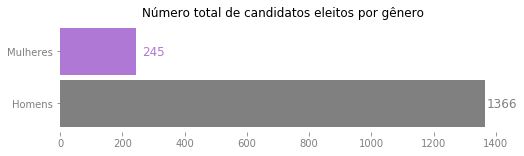

In [24]:
f, ax = plt.subplots(figsize=(8, 2))

colors = ['grey', '#af78d4']

#apaga os contornos da imagem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#deixa os marcadores numa cor mais suave que o preto
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

#GRÁFICO
ax1 = plt.barh(y=['Homens', 'Mulheres'],
               height=0.9,
               width=df_uni['genero'].value_counts().values,
               color=colors)

#adiciona as labels dentro do gráfico
rects = plt.barh(y=['Homens', 'Mulheres'],
                 height=0.9,
                 width=df_uni['genero'].value_counts().values,
                 color=colors)
labels = df_uni['genero'].value_counts().values

for rect, label, color in zip(rects, labels, colors):
    width = rect.get_width()
    ax.text(width + 55,
            rect.get_y() + (rect.get_height() / 3),
            str(label),
            ha="center",
            va="bottom",
            color=color,
            size=12)

plt.title('Número total de candidatos eleitos por gênero', fontsize=12)
plt.xlabel('')
plt.show()

In [25]:
245/1366


0.17935578330893118

In [26]:
df_uni['genero'].value_counts().values

array([1366,  245], dtype=int64)

## Raça

In [27]:
Mul_raca = (df_uni_mul['raca'].value_counts())*100/df_uni_mul.shape[0]
Hom_raca = (df_uni_hom['raca'].value_counts())*100/df_uni_hom.shape[0]

In [28]:
Mul_raca

branca      73.061224
parda       18.775510
preta        7.755102
indigena     0.408163
Name: raca, dtype: float64

In [29]:
Hom_raca

branca     72.474378
parda      24.084919
preta       3.221083
amarela     0.219619
Name: raca, dtype: float64

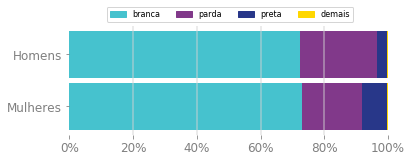

In [30]:
f, ax = plt.subplots(figsize=(6, 2))

## AJUSTES DA IMAGEM

#apaga os contornos da imagem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ajusta para que os números fiquem no formato percentual
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

#deixa os marcadores numa cor mais suave que o preto
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

#aumenta o tamanho da letra pra que fique mais visível
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

# coloca as linhas verticais auxiliares
plt.vlines(20, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.6)
plt.vlines(40, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.6)
plt.vlines(60, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.6)
plt.vlines(80, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.6)
plt.xlabel('', )

#vetor das cores que vamos usar
colors = ['#46C2CE', '#81398A', '#283789', 'gold']

#cria legenda
brancos = mpatches.Patch(color=colors[0], label='branca')
pardos = mpatches.Patch(color=colors[1], label='parda')
pretos = mpatches.Patch(color=colors[2], label='preta')
amarelos_vermelhos = mpatches.Patch(color=colors[3], label='demais')

#ajusta parametros da legenda
ax.legend(handles=[brancos, pardos, pretos, amarelos_vermelhos],
          ncol=4,
          bbox_to_anchor=(0.1, 1),
          fontsize=8)

##GRÁFICO

p1 = plt.barh(y='Mulheres',
              height=0.9,
              width=Mul_raca.values[0],
              color=colors[0])
lefts = Mul_raca.values[0]

p2 = plt.barh(y='Mulheres',
              height=0.9,
              width=Mul_raca.values[1],
              color=colors[1],
              left=lefts)

lefts = lefts + Mul_raca.values[1]

p3 = plt.barh(y='Mulheres',
              height=0.9,
              width=Mul_raca.values[2],
              color=colors[2],
              left=lefts)

lefts = lefts + Mul_raca.values[2]

p4 = plt.barh(y='Mulheres',
              height=0.9,
              width=Mul_raca.values[3],
              color=colors[3],
              left=lefts)

lefts = lefts + Mul_raca.values[3]

p1 = plt.barh(y='Homens',
              height=0.9,
              width=Hom_raca.values[0],
              color=colors[0])
lefts = Hom_raca.values[0]

p2 = plt.barh(y='Homens',
              height=0.9,
              width=Hom_raca.values[1],
              color=colors[1],
              left=lefts)

lefts = lefts + Hom_raca.values[1]

p3 = plt.barh(y='Homens',
              height=0.9,
              width=Hom_raca.values[2],
              color=colors[2],
              left=lefts)

lefts = lefts + Hom_raca.values[2]

p4 = plt.barh(y='Homens',
              height=0.9,
              width=Hom_raca.values[3],
              color=colors[3],
              left=lefts)



ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.show()

## Nível de Instrução

In [31]:
Mul_instrucao = (
    df_uni_mul['instrucao'].value_counts()) * 100 / df_uni_mul.shape[0]
Hom_instrucao = (
    df_uni_hom['instrucao'].value_counts()) * 100 / df_uni_hom.shape[0]

In [32]:
def instrucao_agrup(instrucao):
    if instrucao != 'ensino superior completo':
        return 'Sem ensino superior completo'
    else:
        return 'Com ensino superior completo'

In [33]:
Mul_instrucao = Mul_instrucao.groupby(instrucao_agrup).sum()
Hom_instrucao = Hom_instrucao.groupby(instrucao_agrup).sum()

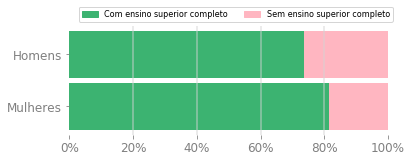

In [34]:
f, ax = plt.subplots(figsize=(6, 2))

## AJUSTES DA IMAGEM

#apaga os contornos da imagem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ajusta para que os números fiquem no formato percentual
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

#deixa os marcadores numa cor mais suave que o preto
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

#aumenta o tamanho da letra pra que fique mais visível
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

# coloca as linhas verticais auxiliares
plt.vlines(20, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.6)
plt.vlines(40, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.6)
plt.vlines(60, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.6)
plt.vlines(80, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.6)
plt.xlabel('', )

#vetor das cores que vamos usar
colors = ['mediumseagreen','lightpink']

#cria a legenda
com_superior = mpatches.Patch(color=colors[0], label='Com ensino superior completo')
sem_superior = mpatches.Patch(color=colors[1], label='Sem ensino superior completo')

#ajusta parametros da legenda
ax.legend(handles=[com_superior, sem_superior],
          ncol=2,
          bbox_to_anchor=(0.017, 1),
          fontsize=8)

##GRÁFICO
p1 = plt.barh(y='Mulheres',
        height=0.9,
        width = Mul_instrucao.values[0],
        color = colors[0])
lefts = Mul_instrucao.values[0]

p2 = plt.barh(y='Mulheres',
        height=0.9,
        width = Mul_instrucao.values[1],
        color = colors[1],
        left = lefts)

lefts = lefts + Mul_instrucao.values[1]

p1 = plt.barh(y='Homens',
        height=0.9,
        width = Hom_instrucao.values[0],
        color = colors[0])
lefts = Hom_instrucao.values[0]

p2 = plt.barh(y='Homens',
        height=0.9,
        width = Hom_instrucao.values[1],
        color = colors[1],
        left = lefts)

plt.show()

## Estado Civil

In [35]:
Mul_estado_civil = (
    df_uni_mul['estado_civil'].value_counts()) * 100 / df_uni_mul.shape[0]
Hom_estado_civil = (
    df_uni_hom['estado_civil'].value_counts()) * 100 / df_uni_hom.shape[0]

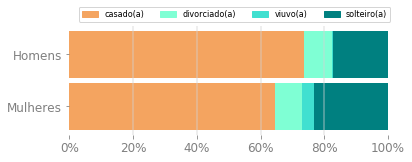

In [36]:
f, ax = plt.subplots(figsize=(6, 2))

## AJUSTES DA IMAGEM

#apaga os contornos da imagem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ajusta para que os números fiquem no formato percentual
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

#deixa os marcadores numa cor mais suave que o preto
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

#aumenta o tamanho da letra pra que fique mais visível
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

#ajusta as cores que vamos usar
colors = ['sandybrown', 'teal', 'aquamarine', 'turquoise']

#cria a legenda
casados = mpatches.Patch(color=colors[0], label='casado(a)')
solteiros = mpatches.Patch(color=colors[1], label='solteiro(a)')
divorciados = mpatches.Patch(color=colors[2], label='divorciado(a)')
viuvos = mpatches.Patch(color=colors[3], label='viuvo(a)')

#ajusta parametros da legenda
ax.legend(handles=[casados, divorciados, viuvos, solteiros],
          ncol=4,
          bbox_to_anchor=(0.017, 1),
          fontsize=8)

# coloca as linhas verticais auxiliares
plt.vlines(20, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.5)
plt.vlines(40, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.5)
plt.vlines(60, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.5)
plt.vlines(80, ymin=-0.6, ymax=1.6, color='lightgray', alpha=0.5)

plt.xlabel('', )

## GRÁFICO

#para fazer o gráfico de barras empilhadas vamos plotar cada um das categorias separadamente
p1 = plt.barh(y='Mulheres',
              height=0.9,
              width=Mul_estado_civil.values[0],
              color=colors[0])
lefts = Mul_estado_civil.values[0]

p2 = plt.barh(y='Mulheres',
              height=0.9,
              width=Mul_estado_civil.values[2],
              color=colors[2],
              left=lefts)
lefts = lefts + Mul_estado_civil.values[2]

p3 = plt.barh(y='Mulheres',
              height=0.9,
              width=Mul_estado_civil.values[3],
              color=colors[3],
              left=lefts)
lefts = lefts + Mul_estado_civil.values[3]

p4 = plt.barh(y='Mulheres',
              height=0.9,
              width=Mul_estado_civil.values[1],
              color=colors[1],
              left=lefts)

p1 = plt.barh(y='Homens',
              height=0.9,
              width=Hom_estado_civil.values[0],
              color=colors[0])
lefts = Hom_estado_civil.values[0]

p2 = plt.barh(y='Homens',
              height=0.9,
              width=Hom_estado_civil.values[2],
              color=colors[2],
              left=lefts)
lefts = lefts + Hom_estado_civil.values[2]

p3 = plt.barh(y='Homens',
              height=0.9,
              width=Hom_estado_civil.values[3],
              color=colors[3],
              left=lefts)
lefts = lefts + Hom_estado_civil.values[3]

p4 = plt.barh(y='Homens',
              height=0.9,
              width=Hom_estado_civil.values[1],
              color=colors[1],
              left=lefts)

plt.show()

## Faixa Etária

In [37]:
ranges = [20,30,40,50,60,70,80,90]
y_label_idade = [ "(20, 30]", "(30, 40]", "(40, 50]", "(50, 60]", "(60, 70]", "(70, 80]", "(80, 90]"]

In [38]:
data_idade = df_uni[['genero','idade']]

mas =  data_idade['genero'] == 'masculino'
data_idade_mas = data_idade[mas][['idade']]
data_idade_mas = data_idade_mas.groupby(pd.cut(data_idade_mas.idade,
                           ranges)).count() * 100 / df_uni_hom.shape[0]

fem = data_idade['genero'] == 'feminino'
data_idade_fem = data_idade[fem][['idade']]
data_idade_fem = data_idade_fem.groupby(pd.cut(data_idade_fem.idade,
                           ranges)).count() * 100 / df_uni_mul.shape[0]

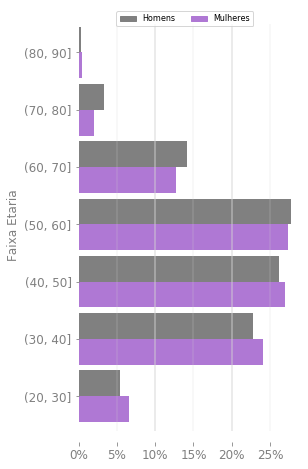

In [39]:
f, ax = plt.subplots(figsize=(4, 8))

## AJUSTES DA IMAGEM

#apaga os contornos da imagem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#linhas verticais auxiliares
plt.vlines(5, ymin=-0.6, ymax=6.5, color='lightgray', alpha=0.2)
plt.vlines(10, ymin=-0.6, ymax=6.5, color='lightgray', alpha=0.6)
plt.vlines(15, ymin=-0.6, ymax=6.5, color='lightgray', alpha=0.2)
plt.vlines(20, ymin=-0.6, ymax=6.5, color='lightgray', alpha=0.6)
plt.vlines(25, ymin=-0.6, ymax=6.5, color='lightgray', alpha=0.2)

#ajusta para que os números fiquem no formato percentual
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

#deixa os marcadores numa cor mais suave que o preto
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray')

#aumenta o tamanho da letra pra que fique mais visível
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

#nome do eixo y 
plt.ylabel('Faixa Etaria',color='gray', fontsize=12)

#vetor de cores
colors = ['grey', '#af78d4']

#cria a legenda
homens = mpatches.Patch(color=colors[0], label='Homens')
mulheres = mpatches.Patch(color=colors[1], label='Mulheres')


#ajusta parametros da legenda
ax.legend(handles=[homens, mulheres],
          ncol=2,
          bbox_to_anchor=(0.8, 1),
          fontsize=8)


##GRÁFICO

p1 = plt.barh(y=y_label_idade,
               height=0.45,
               width=data_idade_mas['idade'].values,
               align='edge',
               color='gray')

p2 = plt.barh(y=y_label_idade,
               height=-0.45,
               width=data_idade_fem['idade'].values,
               align='edge',
               color=colors[1])

